In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as k
from keras import backend as K

#General

from data_com import *
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math
import itertools
from keras.models import load_model

In [2]:
from sklearn.metrics import confusion_matrix 

def plot_confusion_matrix(y_true, y_pred, title, Y_lbl, cmap = plt.cm.Blues):
    classes = np.unique(Y_lbl)
    labels = range(len(classes))

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm2 = np.round(cm/cm.sum(axis=1)[:,None]*100, decimals=1)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm2, interpolation='nearest', cmap=cmap, vmin=0, vmax=100)
    plt.title(title+" confusion matrix", fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)
    
    thresh = cm2.max() / 2.
    for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
        plt.text(j, i, cm2[i, j],
                 horizontalalignment="center",
                 color="white" if cm2[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)

    plt.show()
def evaluation(confusion_matrix):
    TP = np.diag(confusion_matrix)
    FP = np.sum(confusion_matrix, axis=0) - TP 
    FN = np.sum(confusion_matrix, axis=1) - TP
    TN = []

    for i in range(confusion_matrix.shape[1]):
        temp = np.delete(confusion_matrix, i, 0)    # delete ith row\n",
        temp = np.delete(temp, i, 1)  # delete ith column\
        TN.append(sum(sum(temp)))

        accuracy = np.round((TP+TN)/(TP+TN+FP+FN)*100, 2)
        specificity = np.round(TN/(TN+FP)*100,2)
        recall = np.round(TP/(TP+FN)*100, 2)
        
        df_column_names = ['Accuracy (%)','Specificity (%)','Sensit/Recall (%)']
        df_row_names = ['F','N','S','V']
        evaluation = pd.DataFrame(np.concatenate((accuracy.reshape(-1,1),
                                                  specificity.reshape(-1,1),
                                                  recall.reshape(-1,1)),axis=1),
                                                  index=df_row_names, columns=df_column_names)
        return evaluation
    

In [3]:

#Single beat classifier

classifier_1beat = load_model("classifier_1beat_residual_MODEL-Copy1")

classifier_1beat.fit(bal_train_1beat_final, bal_train_oh_final, batch_size = 256, epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
1087/1087 [==============================] - 23s 19ms/step - loss: 0.1110 - accuracy: 0.9743 - val_loss: 5.4626 - val_accuracy: 0.2077
Epoch 2/100
1087/1087 [==============================] - 20s 18ms/step - loss: 0.0340 - accuracy: 0.9913 - val_loss: 5.7650 - val_accuracy: 0.1956
Epoch 3/100
1087/1087 [==============================] - 20s 18ms/step - loss: 0.0244 - accuracy: 0.9941 - val_loss: 6.1648 - val_accuracy: 0.1630
Epoch 4/100
1087/1087 [==============================] - 20s 18ms/step - loss: 0.0184 - accuracy: 0.9957 - val_loss: 5.6394 - val_accuracy: 0.2384
Epoch 5/100
1087/1087 [==============================] - 20s 18ms/step - loss: 0.0159 - accuracy: 0.9964 - val_loss: 6.0139 - val_accuracy: 0.2160
Epoch 6/100
1087/1087 [==============================] - 20s 18ms/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 6.5542 - val_accuracy: 0.1866
Epoch 7/100
1087/1087 [==============================] - 20s 19ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 6

In [4]:
#Triple beat classifier
encoder_3beat = load_model("encoder_3beat_residual_MODEL-Copy1")
classifier_3beat = load_model("classifier_3beat_residual_MODEL-Copy1")

feature_vector_train_3beat = encoder_3beat.predict(bal_train_3beat_final)
classifier_3beat.fit(feature_vector_train_3beat,bal_train_oh_final, batch_size = 256, epochs = 50, validation_split = 0.2, verbose = 1)

10869/10869 [==============================] - 22s 2ms/step
Epoch 1/50
1087/1087 [==============================] - 2s 2ms/step - loss: 1.1852 - accuracy: 0.5429 - val_loss: 1.1372 - val_accuracy: 0.5144
Epoch 2/50
1087/1087 [==============================] - 2s 2ms/step - loss: 0.9456 - accuracy: 0.6049 - val_loss: 1.1756 - val_accuracy: 0.4849
Epoch 3/50
1087/1087 [==============================] - 2s 2ms/step - loss: 0.8703 - accuracy: 0.6386 - val_loss: 1.2372 - val_accuracy: 0.4673
Epoch 4/50
1087/1087 [==============================] - 2s 2ms/step - loss: 0.8194 - accuracy: 0.6619 - val_loss: 1.3181 - val_accuracy: 0.4771
Epoch 5/50
1087/1087 [==============================] - 2s 2ms/step - loss: 0.7802 - accuracy: 0.6809 - val_loss: 1.3830 - val_accuracy: 0.4680
Epoch 6/50
1087/1087 [==============================] - 2s 2ms/step - loss: 0.7492 - accuracy: 0.6959 - val_loss: 1.4724 - val_accuracy: 0.4377
Epoch 7/50
1087/1087 [==============================] - 2s 2ms/step - loss: 

In [5]:
predicted_1beat = classifier_1beat.predict(test_1beat_final)
predicted_1beat = predicted_1beat.argmax(axis=-1)

feature_vector_test_3beat = encoder_3beat.predict(test_3beat_final)
predicted_3beat = classifier_3beat.predict(feature_vector_test_3beat)
predicted_3beat = predicted_3beat.argmax(axis=-1) 

2759/2759 [==============================] - 1s 445us/step


In [6]:
#Classifiers combination
from sklearn import preprocessing
from tensorflow.keras.models import load_model

predicted_labels = np.empty(np.shape(test_lbl_final))
for i in range(0,len(predicted_labels)):
    if predicted_1beat[i] == 3:
        predicted_labels[i] = predicted_1beat[i]
    else:
        predicted_labels[i] = predicted_3beat[i]




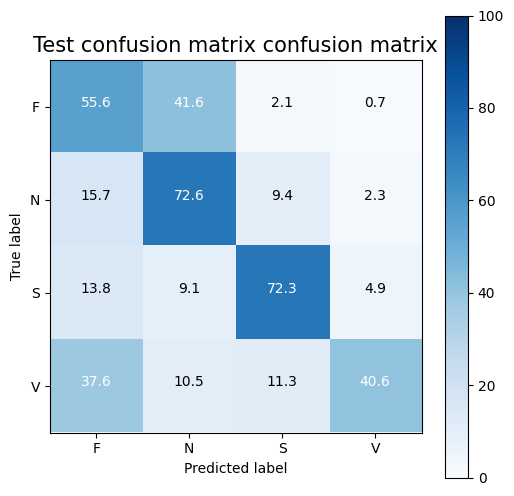

,Accuracy (%),Specificity (%),Sensit/Recall (%)
F,82.70,82.83,55.58
N,85.13,98.57,72.59
S,89.42,89.99,72.26
V,93.10,97.35,40.65


In [7]:
#Confusion matrix
import itertools

plot_confusion_matrix(test_int_final, predicted_3beat, "Test confusion matrix", test_lbl_final)
cm = confusion_matrix(test_int_final, predicted_3beat)
Eval = evaluation(cm)
display(Eval)

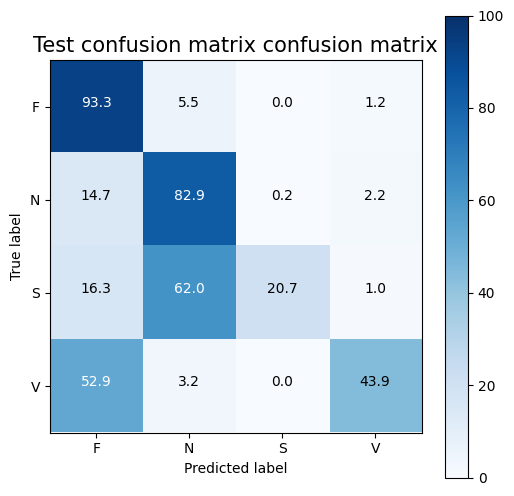

,Accuracy (%),Specificity (%),Sensit/Recall (%)
F,82.64,82.59,93.35
N,89.95,97.47,82.88
S,96.97,99.79,20.73
V,93.56,97.61,43.90


In [8]:
#Confusion matrix
import itertools

plot_confusion_matrix(test_int_final, predicted_1beat, "Test confusion matrix", test_lbl_final)
cm = confusion_matrix(test_int_final, predicted_1beat)
Eval = evaluation(cm)
display(Eval)

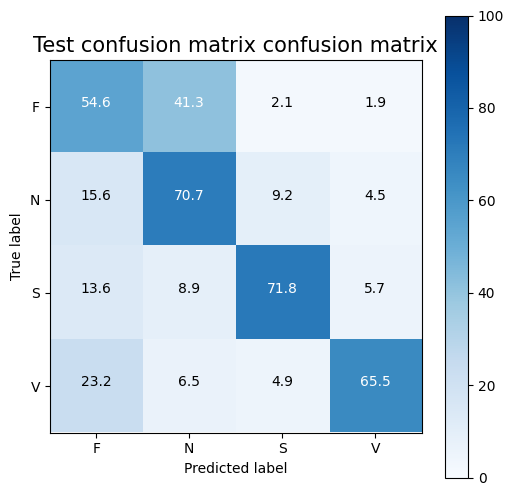

,Accuracy (%),Specificity (%),Sensit/Recall (%)
F,83.78,83.92,54.63
N,84.39,98.92,70.69
S,90.06,90.67,71.81
V,93.05,95.21,65.46


In [9]:
#Confusion matrix
import itertools

plot_confusion_matrix(test_int_final, predicted_labels, "Test confusion matrix", test_lbl_final)
cm = confusion_matrix(test_int_final, predicted_labels)
Eval = evaluation(cm)
display(Eval)            